# 1. Предсказание цены на недвижимость

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [10]:
import numpy as np

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [11]:
from sklearn.datasets import load_boston

In [12]:
print(load_boston())

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [20]:
keys = load_boston()
keys.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
X, y = load_boston(return_X_y = True)

In [24]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
print(load_boston().data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [14]:
X.shape

(506, 13)

In [15]:
y.shape

(506,)

### Задание.

1. Показать Dataframe в привычном виде.

In [31]:
load_boston().feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
df = pd.DataFrame(X, columns = load_boston()['feature_names'])
df['MEDV'] = y
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Задание. Формирование выборок

разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы данных из X, y

In [71]:
"""
создать X_train, X_test, y_train, y_test

"""

#df_train = df.sample(frac = 0.8)
#df_test = df.drop(X_train.index) 

train_shape = 0.8
train_size = int(train_shape * X.shape[0])

X_train = X[:train_size]
y_train = y[:train_size]


test_shape = 0.2
test_size = int(test_shape * X.shape[0])

X_test = X[:test_size]
y_test = y[:test_size]

y_test.shape


(101,)

## Продолжение теории

### Предсказания по тестовой выборке

1. Сделать предсказание

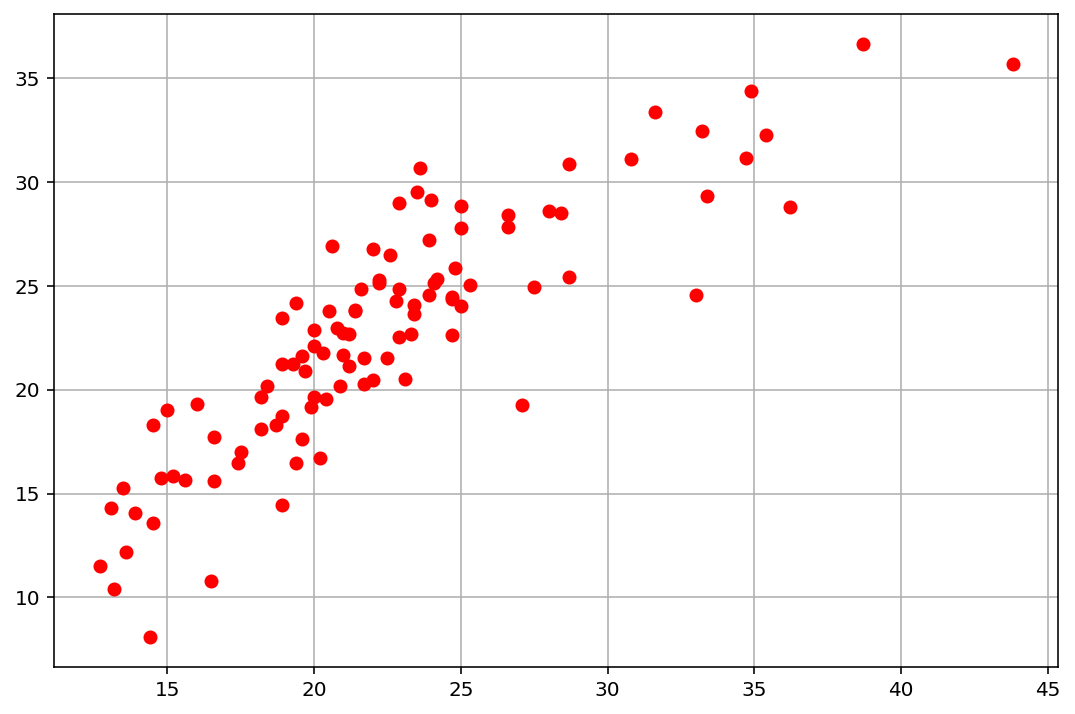

In [85]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(n_jobs = -1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'ro')
plt.grid();

### Оценка

1. сделать визуальное сравнение через matplotlib и seaborn c линией тренда
2. построить гистограмму распределения ошибки
3. найти коэффициент корреляции между предсказанными и реальными значениями и построить heatmap с анотацией


In [99]:
#Гистограмма распределения ошибки
mis = y_pred - y_test 
sns.histplot(mis, bins = 30)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [97]:
corr = pd.DataFrame((y_pred, y_test)).T.corr()
corr

,0,1
0,1.000000,0.864415
1,0.864415,1.000000


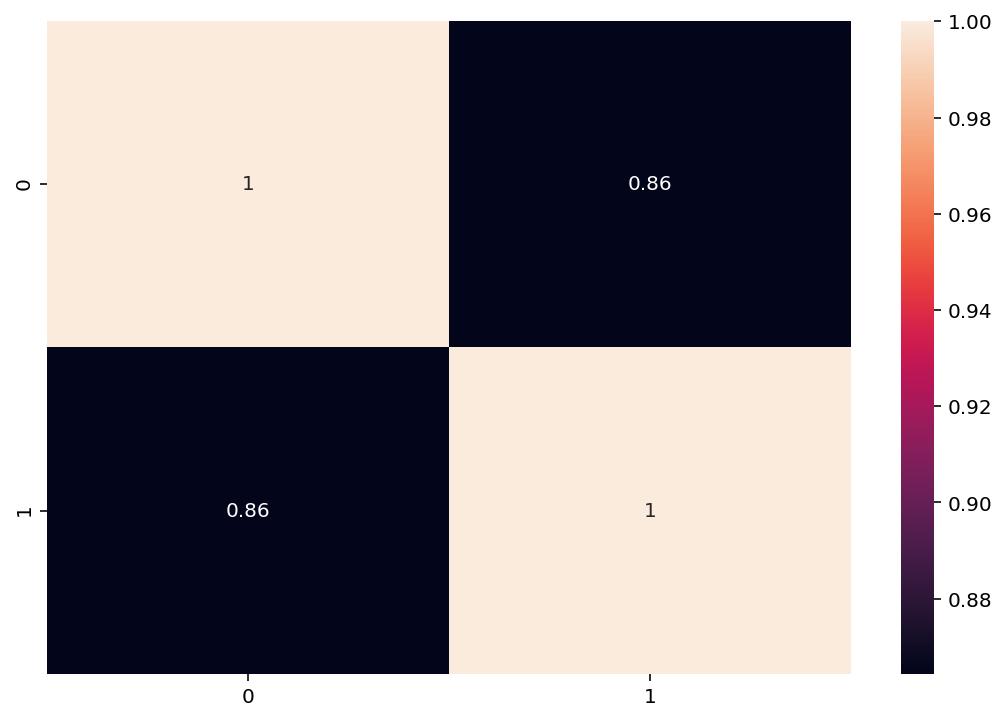

In [100]:
sns.heatmap(corr, annot = True)

### MSE

MSE - среднеквардратичная ошибка, т.е. среднее значение суммы квадратов ошибок

1. Посчитать среденеквадратическую ошибку MSE

In [105]:
mse_sq = np.mean(mis**2)
mse_sq

9.280209107268576

In [104]:
np.sqrt(mse_sq)

3.0463435635641254